In [1]:
import numpy as np
from tqdm import tqdm
import random
import gym
# from gym.wrappers import Monitor
import glob
import io
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
#Setting up the environment
from gym.envs.toy_text.taxi import TaxiEnv
env = TaxiEnv(render_mode = "ansi")

env.reset()

#Current State
print(env.s)


print ("Number of states:", env.observation_space.n)

# Primitive Actions
action = ["up", "right", "down", "left"]
#correspond to [0,1,2,3] that's actually passed to the environment

# either go left, up, down or right
print ("Number of actions that an agent can take:", env.action_space.n)

# Example Transitions
rnd_action = random.randint(0, 3)
print ("Action taken:", action[rnd_action])
next_state, reward, is_terminal, _, t_prob = env.step(rnd_action)
print ("Transition probability:", t_prob)
print ("Next state:", next_state)
print ("Reward recieved:", reward)
print ("Terminal state:", is_terminal)

126
Number of states: 500
Number of actions that an agent can take: 6
Action taken: right
Transition probability: {'prob': 1.0, 'action_mask': array([1, 0, 0, 1, 0, 0], dtype=int8)}
Next state: 26
Reward recieved: -1
Terminal state: False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
env.reset()
print(env.s)
print(list(env.decode(env.s)))
print(*env.render())

274
[2, 3, 3, 2]
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




#Using R, Y, B, G as options



In [4]:
# We are defining two more options here
def Blue(env, state):
    r, c, p, d  = list(env.decode(state))
    optdone = False
    optaction = 0
    if r == 4 and c == 3:
      optdone = True
    if r < 2:
      optaction = 0
    elif c < 3:
      if r==2:
        optaction = 2
      else:
        optaction = 1
    elif c == 4 :
      optaction = 3
    elif c == 3 and r < 4:
      optaction = 0

    if p == 3:
      optction = 4
    if d == 3:
      optaction == 5

    return [optaction, optdone]

def Red(env, state):
    r, c, p, d = list(env.decode(state))
    optdone = False
    optaction = 1
    if r == 0 and c == 0:
      optdone = True
    if r > 2:
      optaction = 1
    elif c > 1:
      if r ==2:
        optaction = 3
      else :
        optaction = 0
    elif c > 0 :
      optaction = 3
    elif  r > 0:
      optaction = 1

    if p == 0:
      optction = 4
    if d == 0:
      optaction == 5

    return [optaction, optdone]

def Yellow(env, state):
    r, c, p, d  = list(env.decode(state))
    optdone = False
    optaction = 0
    if r == 4 and c == 0:
      optdone = True
    if r < 2:
      optaction = 0
    elif c > 0:
      if r ==2:
        optaction = 3
      else :
        optaction = 1
    elif c == 0:
      optaction = 0

    if p == 2:
      optction = 4
    if d == 2:
      optaction == 5

    return [optaction, optdone]

def Green(env, state):
    r, c, p, d  = list(env.decode(state))
    optdone = False
    optaction = 1
    if r == 0 and c == 4:
      optdone = True
    if r > 2:
      optaction = 1
    elif c < 2:
      if r==2:
        optaction = 2
      else :
        optaction = 0
    elif c < 4 :
      optaction = 2
    elif r > 0:
      optaction = 1

    if p == 1:
      optction = 4
    if d == 1:
      optaction == 5

    return [optaction, optdone]




'''
Now the new action space will contain
Primitive Actions: ["North", "South", "East", "West", "Pickup", "Dropoff"]
Options: ["Red","Yellow", "Blue", "Green"]
Total Actions :["North", "South", "East", "West", "Pickup", "Dropoff", "Red", "Yelow", "Blue", "Green"]
Corresponding to [0,1,2,3,4,5,6,7,8,9]
'''

'\nNow the new action space will contain\nPrimitive Actions: ["up", "right", "down", "left"]\nOptions: ["Away","Close"]\nTotal Actions :["up", "right", "down", "left", "Red", "Yelow", "Blue", "Green"]\nCorresponding to [0,1,2,3,4,5]\n'

## SMDP Q Learning

In [18]:
# TODO: epsilon-greedy action selection function
def egreedy_policy(q_values,state,epsilon, episode):
    if not q_values[state].any(): # TODO: eps greedy condition
        return random.randint(0, 9)
    else:
        if(np.random.rand()<epsilon):
            return random.randint(0, 9)
        else:
            return np.argmax(q_values[state])

In [6]:
results = {}

In [ ]:
#### SMDP Q-Learning

def SMDP_Q_learning(env, episodes = 1000, gamma = 0.99, alpha = 0.5, epsilon = 0.1):
    # Add parameters you might need here
    gamma = gamma
    alpha = alpha
    epsilon = epsilon
    rewards =  []
    steps_in_episodes = []

    #Q-Table: (States x Actions) === (env.ns(500) x total actions(10))
    q_values_SMDP = np.zeros((env.observation_space.n,env.action_space.n+4))

    for j in range(episodes):
        state = env.reset()
        done = False

        # While episode is not over
        r = 0
        steps = 0
        while not done:

            # Choose action
            action = egreedy_policy(q_values_SMDP, state, epsilon, j)
            # Checking if primitive action
            if action < 6:
                # Perform regular Q-Learning update for state-action pair
                next_state, reward, done, _, _ = env.step(action)
                q_values_SMDP[state, action] = q_values_SMDP[state, action] + alpha*(reward + gamma*np.max(q_values_SMDP[next_state]) - q_values_SMDP[state, action])
                steps+=1
                r+=reward

            # Checking if action chosen is an option
            if action == 6: # action => Red option
                i = 0
                reward_bar = 0
                start_state = state
                optdone = False
                while (optdone == False):

                    optact,optdone = Red(env,state)
                    next_state, reward, done,_, t_prob = env.step(optact)


                    reward_bar += reward*gamma**i
                    state = next_state
                    i+=1
                    steps+=1
                    r+=reward
                q_values_SMDP[start_state, action] += alpha*(reward_bar + gamma**i*np.max(q_values_SMDP[next_state]) - q_values_SMDP[start_state, action])


            if action == 7: # action => Yellow option
                i = 0
                reward_bar = 0
                start_state = state
                optdone = False
                while (optdone == False):

                    optact,optdone = Yellow(env,state)
                    next_state, reward, done,_, t_prob = env.step(optact)


                    reward_bar += reward*gamma**i
                    state = next_state
                    i+=1
                    steps+=1
                    r+=reward
                q_values_SMDP[start_state, action] += alpha*(reward_bar + gamma**i*np.max(q_values_SMDP[next_state]) - q_values_SMDP[start_state, action])

            if action == 8:# action => Blue option
                  i = 0
                  reward_bar = 0
                  start_state = state
                  optdone = False
                  while (optdone == False):

                      optact,optdone = Blue(env,state)
                      next_state, reward, done,_, t_prob = env.step(optact)

                      reward_bar += reward*gamma**i
                      state = next_state
                      i+=1
                      steps+=1
                      r+=reward
                  q_values_SMDP[start_state, action] += alpha*(reward_bar + gamma**i*np.max(q_values_SMDP[next_state]) - q_values_SMDP[start_state, action])

            if action == 9 :# action => Green option
                  i = 0
                  reward_bar = 0
                  start_state = state
                  optdone = False
                  while (optdone == False):

                      optact,optdone = Green(env,state)
                      next_state, reward, done,_, t_prob = env.step(optact)

                      reward_bar += reward*gamma**i
                      state = next_state
                      i+=1
                      steps+=1
                      r+=reward
                  q_values_SMDP[start_state, action] += alpha*(reward_bar + gamma**i*np.max(q_values_SMDP[next_state]) - q_values_SMDP[start_state, action])


            state = next_state
        steps_in_episodes.append(steps)
        rewards.append(r)

    return q_values_SMDP, np.array(steps_in_episodes), np.array(rewards),


runs = 100
episodes = 1000
steps = np.zeros((episodes,))
rewards = np.zeros((episodes,))
q_values_SMDP = np.zeros((env.observation_space.n,env.action_space.n+4))

for i in tqdm(range(runs), ncols = 100) :
    q_values, step, reward = SMDP_Q_learning(env)
    q_values_SMDP+=q_values/runs
    steps+=step/runs
    rewards+=reward/runs

In [70]:
results["SMDP"] = {"rewards" : rewards, "steps" : steps, "q_values" : q_values_SMDP}

In [54]:
from IPython.display import clear_output
from time import sleep

def execute_option(option, state, steps, q_values_SMDP):
      i = 0
      reward_bar = 0
      start_state = state
      optdone = False
      tot_reward= 0
      while (optdone == False):
          clear_output(wait=True)
          optact,optdone = option(env,state)
          next_state, reward, done,_, t_prob = env.step(optact)

          tot_reward += reward
          state = next_state
          i+=1
          steps+=1

      return tot_reward, steps, next_state

def run_episode(env, q_values_SMDP):
    state = env.reset()
    done = False

    # While episode is not over
    r = 0
    steps = 0
    print(env.render()[-1])
    update = np.zeros_like(q_values_SMDP)

    while not done:

      # Choose action
      clear_output(wait=True)
      action = np.argmax(q_values_SMDP[state])
      # Checking if primitive action
      if action < 6:
          # Perform regular Q-Learning update for state-action pair
          next_state, reward, done, _, _ = env.step(action)

      # Checking if action chosen is an option
      if action == 6: # action => Red option
          reward, steps, next_state,  = execute_option(Red, state, steps, q_values_SMDP)

      if action == 7: # action => Yellow option
          reward, steps, next_state = execute_option(Yellow, state, steps, q_values_SMDP)

      if action == 8:# action => Blue option
            reward, steps, next_state = execute_option(Blue, state, steps, q_values_SMDP)

      if action == 9 :# action => Green option
            reward, steps, next_state = execute_option(Green, state, steps, q_values_SMDP)

      steps+=1
      r+=reward
      state = next_state
      # update_frequency[state, action] +=1
      print(env.render()[-1])
      print(action)
      sleep(1)

    print(steps, r)

run_episode(env, q_values_SMDP)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

5
18 5


In [ ]:
def plot_Q(q_values, destination):
    options = ["South", "North", "East", "West", "Pickup", "Dropoff", "Red", "Yellow", "Blue", "Green"]
    passanger_location = ["Red", "Green", "Yellow", "Blue", "In Taxi"]
    destinations = {"Red":0, "Green":1, "Yellow":2, "Blue":3}
    Q = np.zeros((5,5,5,4,10))
    plt.figure(figsize=(16,16))
    for i in range(500):
      r, c, p, d = list(env.decode(i))
      Q[r, c, p, d, :]=q_values_SMDP[i, :]

    i = destinations[destination]
    for j in range(5):
      if i == j:
        continue
      if j < i:
        plt.subplot(2, 2, j+1)
      else :
        plt.subplot(2, 2, j)
      plt.pcolor(Q[:,:,j,i,:].max(-1), edgecolors='k', linewidths=2)
      # plt.invert_xaxis()
      # print(f"Passanger location is {passanger_location[j]} and Destination is {destination[i]}")
      if j != 4:
        plt.title(f"Pickup point is {passanger_location[j]} and Destination is {destination}")
      else :
        plt.title(f"Passanger is inside taxi and Destination is {destination}")
      plt.colorbar()
      plt.ylim(5, 0)
      plt.xlim(0, 5)
      for k in range(5):
        for l in range(5):
            t = options[np.argmax(Q[l, k, j, i, :])][0]
            plt.text(k + 0.5, l + 0.5, t, ha='center', va='center', color='red', size='large')


    plt.show()

plot_Q(q_values_SMDP, "Green")

## Intra Option Q Learning



In [ ]:

def Intra_option_Q_learning(env, episodes = 1000, gamma = 0.99, alpha = 0.5, epsilon = 0.1):
    # Add parameters you might need here
    gamma = gamma
    alpha = alpha
    epsilon = epsilon
    rewards =  []
    steps_in_episodes = []

    #Q-Table: (States x Actions) === (env.ns(500) x total actions(10))
    q_values_intra = np.zeros((env.observation_space.n,env.action_space.n+4))

    for j in range(episodes):
        state = env.reset()
        done = False

        # While episode is not over
        r = 0
        steps = 0
        while not done:

            # Choose action
            action = egreedy_policy(q_values_intra, state, epsilon, j)
            # Checking if primitive action
            if action < 6:
                # Perform regular Q-Learning update for state-action pair
                next_state, reward, done, _, _ = env.step(action)
                q_values_intra[state, action] = q_values_intra[state, action] + alpha*(reward + gamma*(q_values_intra[next_state][action]) - q_values_intra[state, action])
                steps+=1
                r+=reward

                options_dict = {6: Red, 7:Yellow, 8:Blue, 9:Green}
                for k in range(6, 10):#iterating over options
                    optact, optdone = options_dict[k](env, state)
                    if optact == action :
                        beta = 1 if optdone else 0
                        u = (1-beta)*q_values_intra[next_state, k] + beta*np.max(q_values_intra[next_state])
                        q_values_intra[state, k] = (1-alpha)*q_values_intra[state, k]+alpha*(reward+gamma*u)


            # Checking if action chosen is an option
            if action == 6: # action => Red option
                i = 0
                reward_bar = 0
                start_state = state
                optdone = False
                while (optdone == False):

                    optact,optdone = Red(env,state)
                    beta = 1 if optdone else 0
                    next_state, reward, done,_, t_prob = env.step(optact)
                    u = (1-beta)*q_values_intra[next_state, action] + beta*np.max(q_values_intra[next_state])
                    q_values_intra[state, action] = (1-alpha)*q_values_intra[state, action]+alpha*(reward+gamma*u)
                    state = next_state
                    i+=1
                    steps+=1
                    r+=reward


            if action == 7: # action => Yellow option
                i = 0
                reward_bar = 0
                start_state = state
                optdone = False
                while (optdone == False):

                    optact,optdone = Yellow(env,state)
                    beta = 1 if optdone else 0
                    next_state, reward, done,_, t_prob = env.step(optact)
                    u = (1-beta)*q_values_intra[next_state, action] + beta*np.max(q_values_intra[next_state])
                    q_values_intra[state, action] = (1-alpha)*q_values_intra[state, action]+alpha*(reward+gamma*u)
                    state = next_state
                    i+=1
                    steps+=1
                    r+=reward

            if action == 8:# action => Blue option
                  i = 0
                  reward_bar = 0
                  start_state = state
                  optdone = False
                  while (optdone == False):

                      optact,optdone = Blue(env,state)
                      beta = 1 if optdone else 0
                      next_state, reward, done,_, t_prob = env.step(optact)

                      u = (1-beta)*q_values_intra[next_state, action] + beta*np.max(q_values_intra[next_state])
                      q_values_intra[state, action] = (1-alpha)*q_values_intra[state, action]+alpha*(reward+gamma*u)
                      state = next_state
                      i+=1
                      steps+=1
                      r+=reward

            if action == 9 :# action => Green option
                  i = 0
                  reward_bar = 0
                  start_state = state
                  optdone = False
                  while (optdone == False):

                      optact,optdone = Green(env,state)
                      beta = 1 if optdone else 0
                      next_state, reward, done,_, t_prob = env.step(optact)

                      u = (1-beta)*q_values_intra[next_state, action] + beta*np.max(q_values_intra[next_state])
                      q_values_intra[state, action] = (1-alpha)*q_values_intra[state, action]+alpha*(reward+gamma*u)
                      state = next_state
                      i+=1
                      steps+=1
                      r+=reward


            state = next_state
        steps_in_episodes.append(steps)
        rewards.append(r)

    return q_values_intra, np.array(steps_in_episodes), np.array(rewards),


runs = 100
episodes = 1000
steps = np.zeros((episodes,))
rewards = np.zeros((episodes,))
q_values_intra = np.zeros((env.observation_space.n,env.action_space.n+4))

for i in tqdm(range(runs), ncols = 100) :
    q_values, step, reward = Intra_option_Q_learning(env)
    q_values_intra+=q_values/runs
    steps+=step/runs
    rewards+=reward/runs

In [74]:
results["Intra_options"] = {"rewards" : rewards, "steps" : steps, "q_values" : q_values_intra}

In [73]:
run_episode(env, q_values_intra)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

5
17 5


In [ ]:
plot_Q(q_values_intra, "Green")

#Using Alternate Options

We create two options, Pull and Place which are built over previous options Red, Yellow, Blue and Green.
- Pull : Will pick up passanger from any of the four designated location.
- Place : Will drop passanger to any of the four designated location.

In [79]:
def Pull(env, state):
    r, c, p, d = list(env.decode(state))
    optdone = False
    optaction = 1
    if p == 4:
       optdone = True
    elif  p == 0:
      [optaction, optdone] = Red(env, state)
    elif p == 1:
      [optaction, optdone] = Green(env, state)
    elif p == 2:
      [optaction, optdone] = Yellow(env, state)
    elif p == 3:
      [optaction, optdone] = Blue(env, state)

    return [optaction, optdone]

def Place(env, state):
    r, c, p, d = list(env.decode(state))
    optdone = False
    optaction = 1
    if p == d:
       optdone = True
    elif  d == 0:
      [optaction, optdone] = Red(env, state)
    elif d == 1:
      [optaction, optdone] = Green(env, state)
    elif d == 2:
      [optaction, optdone] = Yellow(env, state)
    elif d == 3:
      [optaction, optdone] = Blue(env, state)

    return [optaction, optdone]

In [80]:
# TODO: epsilon-greedy action selection function
def egreedy_policy(q_values,state,epsilon, episode):
    if not q_values[state].any(): # TODO: eps greedy condition
        return random.randint(0, 7)
    else:
        if(np.random.rand()<epsilon):
            return random.randint(0, 7)
        else:
            return np.argmax(q_values[state])

In [81]:
results_alternate = {}

##SMDP Q Learning

In [ ]:
#### SMDP Q-Learning

def SMDP_Q_learning(env, episodes = 1000, gamma = 0.99, alpha = 0.5, epsilon = 0.1):
    # Add parameters you might need here
    gamma = gamma
    alpha = alpha
    epsilon = epsilon
    rewards =  []
    steps_in_episodes = []

    #Q-Table: (States x Actions) === (env.ns(500) x total actions(10))
    q_values_SMDP = np.zeros((env.observation_space.n,env.action_space.n+2))

    for j in range(episodes):
        state = env.reset()
        done = False

        # While episode is not over
        r = 0
        steps = 0
        while not done:

            # Choose action
            action = egreedy_policy(q_values_SMDP, state, epsilon, j)
            # Checking if primitive action
            if action < 6:
                # Perform regular Q-Learning update for state-action pair
                next_state, reward, done, _, _ = env.step(action)
                q_values_SMDP[state, action] = q_values_SMDP[state, action] + alpha*(reward + gamma*np.max(q_values_SMDP[next_state]) - q_values_SMDP[state, action])
                steps+=1
                r+=reward

            # Checking if action chosen is an option
            if action == 6: # action => Pull option
                i = 0
                reward_bar = 0
                start_state = state
                optdone = False
                while (optdone == False):

                    optact,optdone = Pull(env,state)
                    next_state, reward, done,_, t_prob = env.step(optact)


                    reward_bar += reward*gamma**i
                    state = next_state
                    i+=1
                    steps+=1
                    r+=reward
                q_values_SMDP[start_state, action] += alpha*(reward_bar + gamma**i*np.max(q_values_SMDP[next_state]) - q_values_SMDP[start_state, action])


            if action == 7: # action => Place option
                i = 0
                reward_bar = 0
                start_state = state
                optdone = False
                while (optdone == False):

                    optact,optdone = Place(env,state)
                    next_state, reward, done,_, t_prob = env.step(optact)


                    reward_bar += reward*gamma**i
                    state = next_state
                    i+=1
                    steps+=1
                    r+=reward
                q_values_SMDP[start_state, action] += alpha*(reward_bar + gamma**i*np.max(q_values_SMDP[next_state]) - q_values_SMDP[start_state, action])


            state = next_state
        steps_in_episodes.append(steps)
        rewards.append(r)

    return q_values_SMDP, np.array(steps_in_episodes), np.array(rewards),


runs = 100
episodes = 1000
steps = np.zeros((episodes,))
rewards = np.zeros((episodes,))
q_values_SMDP = np.zeros((env.observation_space.n,env.action_space.n+2))

for i in tqdm(range(runs), ncols = 100) :
    q_values, step, reward = SMDP_Q_learning(env)
    q_values_SMDP+=q_values/runs
    steps+=step/runs
    rewards+=reward/runs

In [ ]:
results_alternate["SMDP"] = {"rewards" : rewards, "steps" : steps, "q_values" : q_values_SMDP}

In [85]:
from IPython.display import clear_output
from time import sleep

def execute_option(option, state, steps, q_values_SMDP):
      i = 0
      reward_bar = 0
      start_state = state
      optdone = False
      tot_reward= 0
      while (optdone == False):
          clear_output(wait=True)
          optact,optdone = option(env,state)
          next_state, reward, done,_, t_prob = env.step(optact)

          tot_reward += reward
          state = next_state
          i+=1
          steps+=1

      return tot_reward, steps, next_state

def run_episode(env, q_values_SMDP):
    state = env.reset()
    done = False

    # While episode is not over
    r = 0
    steps = 0
    print(env.render()[-1])
    update = np.zeros_like(q_values_SMDP)

    while not done:

      # Choose action
      clear_output(wait=True)
      action = np.argmax(q_values_SMDP[state])
      # Checking if primitive action
      if action < 6:
          # Perform regular Q-Learning update for state-action pair
          next_state, reward, done, _, _ = env.step(action)

      # Checking if action chosen is an option
      if action == 6: # action => Red option
          reward, steps, next_state,  = execute_option(Pull, state, steps, q_values_SMDP)

      if action == 7: # action => Yellow option
          reward, steps, next_state = execute_option(Place, state, steps, q_values_SMDP)

      steps+=1
      r+=reward
      state = next_state
      # update_frequency[state, action] +=1
      print(env.render()[-1])
      print(action)
      sleep(1)

    print(steps, r)

run_episode(env, q_values_SMDP)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

5
14 9


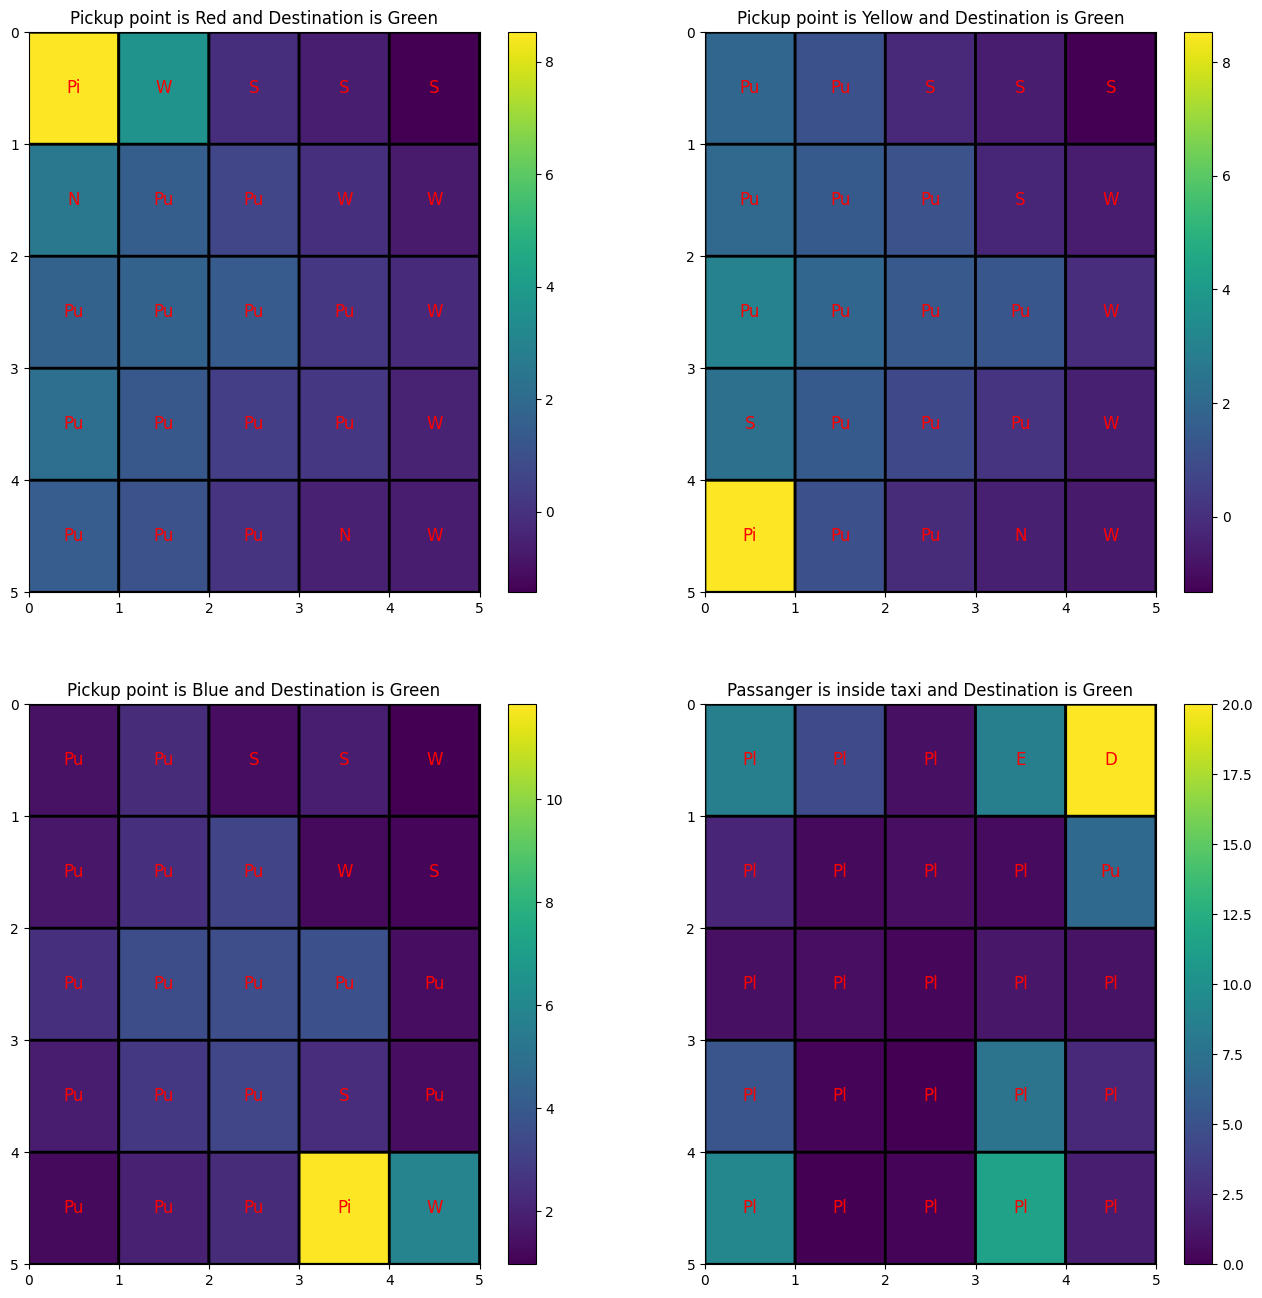

In [90]:
def plot_Q(q_values, destination):
    options = ["South", "North", "East", "West", "Pickup", "Dropoff", "Pull", "Place"]
    passanger_location = ["Red", "Green", "Yellow", "Blue", "In Taxi"]
    destinations = {"Red":0, "Green":1, "Yellow":2, "Blue":3}
    Q = np.zeros((5,5,5,4,8))
    plt.figure(figsize=(16,16))
    for i in range(500):
      r, c, p, d = list(env.decode(i))
      Q[r, c, p, d, :]=q_values_SMDP[i, :]

    i = destinations[destination]
    for j in range(5):
      if i == j:
        continue
      if j < i:
        # print(i, j, j)
        plt.subplot(2, 2, j+1)
      else :
        plt.subplot(2, 2, j)
      plt.pcolor(Q[:,:,j,i,:].max(-1), edgecolors='k', linewidths=2)
      if j != 4:
        plt.title(f"Pickup point is {passanger_location[j]} and Destination is {destination}")
      else :
        plt.title(f"Passanger is inside taxi and Destination is {destination}")
      plt.colorbar()
      plt.ylim(5, 0)
      plt.xlim(0, 5)
      for k in range(5):
        for l in range(5):
            opt = np.argmax(Q[l, k, j, i, :])
            t = options[opt][0:2]
            if int(opt) < 4 or int(opt) == 5:
              t = t[0]
            plt.text(k + 0.5, l + 0.5, t, ha='center', va='center', color='red', size='large')


    plt.show()

plot_Q(q_values_SMDP, "Green")

##Intra Option Q Learning

In [ ]:
#### SMDP Q-Learning

def Intra_option_Q_learning(env, episodes = 1000, gamma = 0.99, alpha = 0.5, epsilon = 0.1):
    # Add parameters you might need here
    gamma = gamma
    alpha = alpha
    epsilon = epsilon
    rewards =  []
    steps_in_episodes = []

    #Q-Table: (States x Actions) === (env.ns(500) x total actions(10))
    q_values_intra = np.zeros((env.observation_space.n,env.action_space.n+2))

    for j in range(episodes):
        state = env.reset()
        done = False

        # While episode is not over
        r = 0
        steps = 0
        while not done:

            # Choose action
            action = egreedy_policy(q_values_intra, state, epsilon, j)
            # Checking if primitive action
            if action < 6:
                # Perform regular Q-Learning update for state-action pair
                next_state, reward, done, _, _ = env.step(action)
                q_values_intra[state, action] = q_values_intra[state, action] + alpha*(reward + gamma*(q_values_intra[next_state][action]) - q_values_intra[state, action])
                steps+=1
                r+=reward

                options_dict = {6: Pull, 7:Place}
                for k in range(6, 8):#iterating over options
                    optact, optdone = options_dict[k](env, state)
                    if optact == action :
                        beta = 1 if optdone else 0
                        u = (1-beta)*q_values_intra[next_state, k] + beta*np.max(q_values_intra[next_state])
                        q_values_intra[state, k] = (1-alpha)*q_values_intra[state, k]+alpha*(reward+gamma*u)


            # Checking if action chosen is an option
            if action == 6: # action => Pull option
                i = 0
                reward_bar = 0
                start_state = state
                optdone = False
                while (optdone == False):

                    optact,optdone = Pull(env,state)
                    beta = 1 if optdone else 0
                    next_state, reward, done,_, t_prob = env.step(optact)
                    u = (1-beta)*q_values_intra[next_state, action] + beta*np.max(q_values_intra[next_state])
                    q_values_intra[state, action] = (1-alpha)*q_values_intra[state, action]+alpha*(reward+gamma*u)
                    state = next_state
                    i+=1
                    steps+=1
                    r+=reward


            if action == 7: # action => Place option
                i = 0
                reward_bar = 0
                start_state = state
                optdone = False
                while (optdone == False):

                    optact,optdone = Place(env,state)
                    beta = 1 if optdone else 0
                    next_state, reward, done,_, t_prob = env.step(optact)
                    u = (1-beta)*q_values_intra[next_state, action] + beta*np.max(q_values_intra[next_state])
                    q_values_intra[state, action] = (1-alpha)*q_values_intra[state, action]+alpha*(reward+gamma*u)
                    state = next_state
                    i+=1
                    steps+=1
                    r+=reward


            state = next_state
        steps_in_episodes.append(steps)
        rewards.append(r)

    return q_values_intra, np.array(steps_in_episodes), np.array(rewards),


runs = 100
episodes = 1000
steps = np.zeros((episodes,))
rewards = np.zeros((episodes,))
q_values_intra = np.zeros((env.observation_space.n,env.action_space.n+2))

for i in tqdm(range(runs), ncols = 100) :
    q_values, step, reward = Intra_option_Q_learning(env)
    q_values_intra+=q_values/runs
    steps+=step/runs
    rewards+=reward/runs

In [94]:
results_alternate["Intra_options"] = {"rewards" : rewards, "steps" : steps, "q_values" : q_values_intra}

In [ ]:
plot_Q(q_values_intra, "Green")